In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv(r'/content/KDDTrainAR.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head(10)

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,6,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,9,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,10,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
data.describe()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,62987.000000,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,36365.417068,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,1.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31494.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62987.000000,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94480.000000,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,125973.000000,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.shape

(125973, 43)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           125973 non-null  int64  
 1   duration                     125973 non-null  int64  
 2   protocol_type                125973 non-null  object 
 3   service                      125973 non-null  object 
 4   flag                         125973 non-null  object 
 5   src_bytes                    125973 non-null  int64  
 6   dst_bytes                    125973 non-null  int64  
 7   land                         125973 non-null  int64  
 8   wrong_fragment               125973 non-null  int64  
 9   urgent                       125973 non-null  int64  
 10  hot                          125973 non-null  int64  
 11  num_failed_logins            125973 non-null  int64  
 12  logged_in                    125973 non-null  int64  
 13 

# Data Preparation

In [0]:
data['class'] = data['class'].map({'anomaly': 1, 'normal': 0}).astype(int)

#data_new['class'] = data_new['class'].astype(int)

# Feature Engineering

## Correlation check

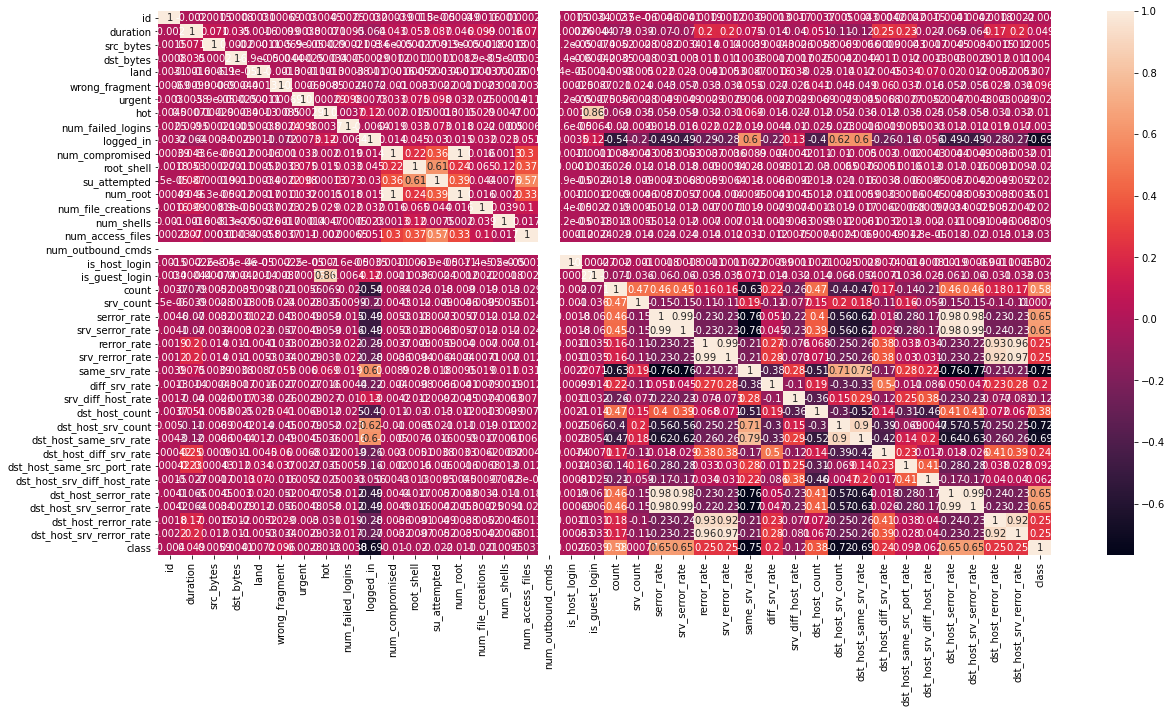

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [9]:
corr = data.corr()
acc1 = corr.abs().unstack()
acc1.sort_values(ascending = False)
display(acc1[acc1 > 0.5])

id                           id                             1.000000
duration                     duration                       1.000000
src_bytes                    src_bytes                      1.000000
dst_bytes                    dst_bytes                      1.000000
land                         land                           1.000000
wrong_fragment               wrong_fragment                 1.000000
urgent                       urgent                         1.000000
hot                          hot                            1.000000
                             is_guest_login                 0.860288
num_failed_logins            num_failed_logins              1.000000
logged_in                    logged_in                      1.000000
                             count                          0.539754
                             same_srv_rate                  0.600536
                             dst_host_srv_count             0.624365
                             dst_h

In [0]:

#Printing correlation
print(round(data[["root_shell","class",]].corr(),2),end="\n\n")
print(round(data[["su_attempted","class",]].corr(),2))



            root_shell  class
root_shell        1.00  -0.02
class            -0.02   1.00

              su_attempted  class
su_attempted          1.00  -0.02
class                -0.02   1.00


In [0]:
data.drop('dst_host_srv_count',axis=1,inplace=True)

In [0]:
data.drop('su_attempted',axis=1,inplace=True)

In [0]:
data.drop('count',axis=1,inplace=True)

In [0]:
data.drop('same_srv_rate',axis=1,inplace=True)

In [0]:
data.drop(['serror_rate','is_guest_login','num_root','dst_host_serror_rate','srv_serror_rate'],axis=1,inplace=True)

In [0]:
data.drop(['dst_host_srv_serror_rate'],axis=1,inplace=True)

In [0]:
data.drop(['rerror_rate'],axis=1,inplace=True)

In [0]:
data.drop(['dst_host_srv_rerror_rate'],axis=1,inplace=True)

In [0]:
data.drop(['dst_host_same_srv_rate'],axis=1,inplace=True)

In [0]:

data.drop(['srv_rerror_rate'],axis=1,inplace=True)

# Create Dummy Variables

In [0]:
#data.drop('service',axis=1,inplace=True)

In [21]:
cat_vars=['protocol_type','flag','service']
for col in cat_vars:
    dummy=pd.get_dummies(data[col],drop_first=True,prefix=col)
    data=pd.concat([data,dummy],axis=1)
    del data[col]
    print(col)
del dummy

protocol_type
flag
service


In [22]:
data.shape

(125973, 107)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 107 entries, id to service_whois
dtypes: float64(6), int64(20), uint8(81)
memory usage: 34.7 MB


In [0]:
data.head()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,class,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,1,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.00,0.00,150,0.03,0.17,0.00,0.05,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.15,0.00,255,0.60,0.88,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.07,0.00,255,0.05,0.00,0.00,0.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0.00,0.00,30,0.00,0.03,0.04,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,32,0.00,0.09,255,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


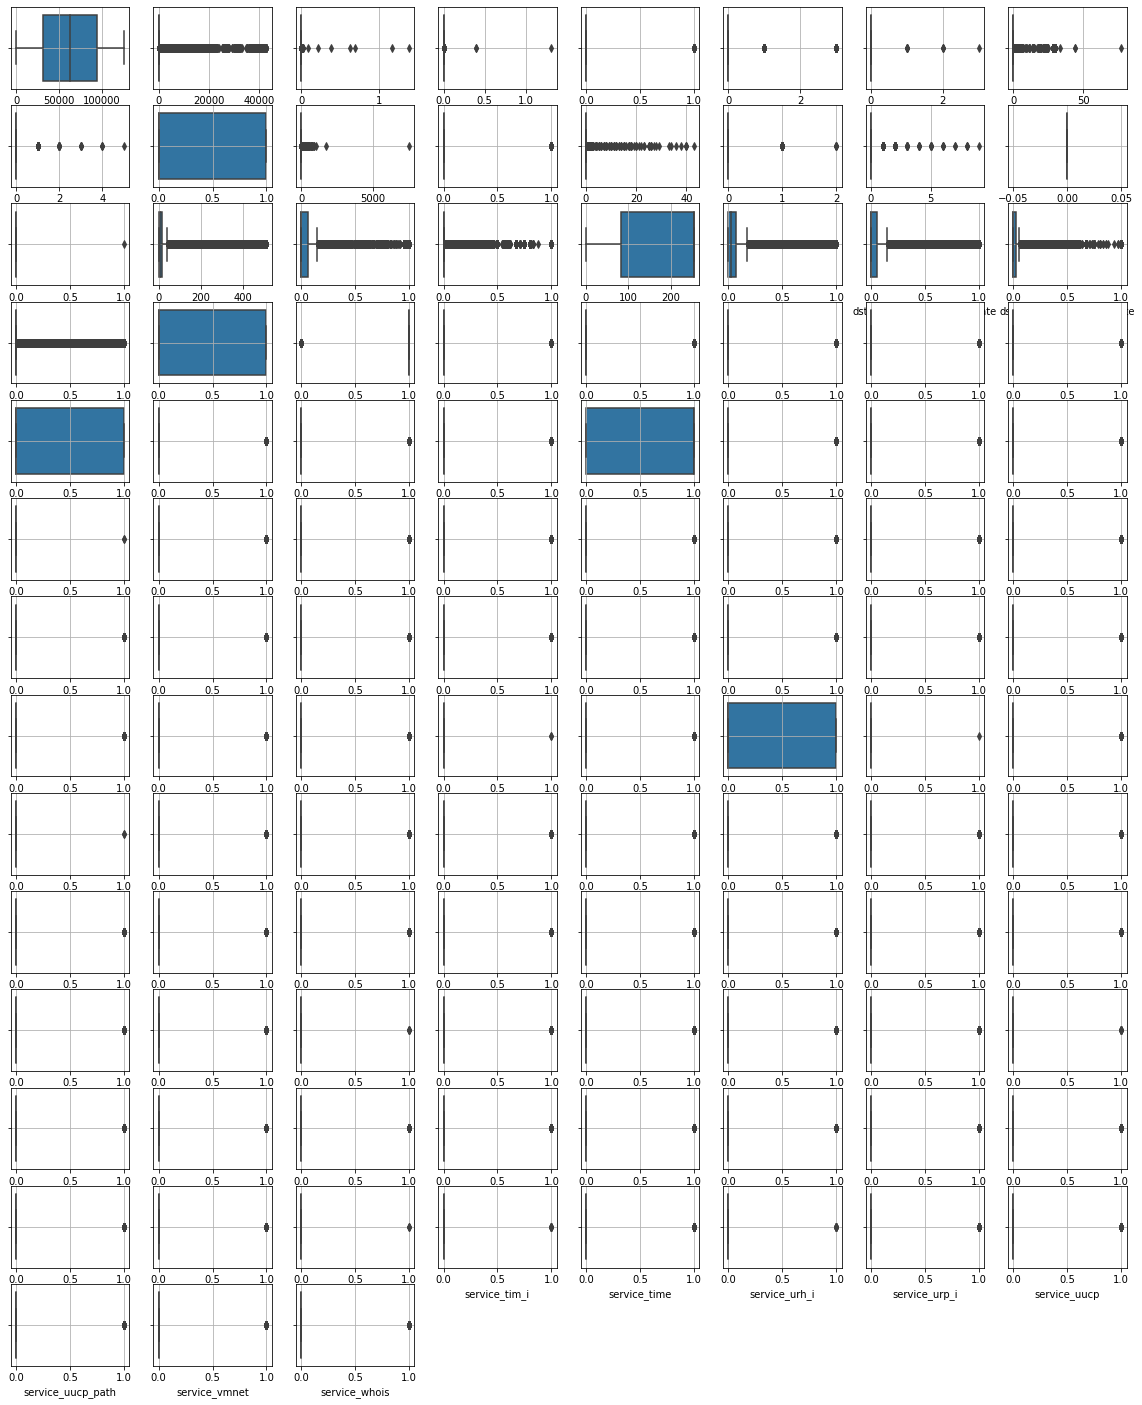

In [0]:
plt.figure(figsize=(20,25))
for i, column in enumerate(list(data.columns)):
    plt.subplot(14,8, i+1)
    sns.boxplot(data[column])
    plt.grid()

In [0]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,class,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
count,125973.000000,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,62987.000000,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.012669,0.000413,0.004096,0.0,0.000008,27.737888,0.063053,0.097322,182.148945,0.082951,0.148379,0.032542,0.118832,0.465417,0.815167,0.119018,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151,0.000579,0.006843,0.000016,0.007581,0.005636,0.005827,0.004326,0.004469,0.004136,0.004271,0.004517,0.071785,0.003445,0.036405,0.024426,0.003850,0.003763,0.014027,0.013924,0.054456,0.004112,0.000016,0.003652,0.320211,0.000008,0.004207,0.000016,0.005136,0.005454,0.003437,0.002374,0.003255,0.003771,0.003405,0.003485,0.003580,0.003215,0.002755,0.002874,0.002858,0.005001,0.002350,0.001334,0.034603,0.00004,0.000619,0.002096,0.000548,0.173474,0.000064,0.000619,0.000683,0.000516,0.058052,0.001945,0.002469,0.003024,0.004318,0.003787,0.018679,0.000024,0.000064,0.005192,0.000079,0.004779,0.006192,0.005469,0.004898,0.005501
std,36365.417068,2604.51

In [24]:
z = np.abs(stats.zscore(data.select_dtypes('float64','int64')))
print(z)

[[0.34968303 0.3745597  0.28028168 0.06997226 0.2891034  0.22453241]
 [0.48220055 0.3745597  2.73685167 2.36773734 0.2891034  0.38763462]
 [0.03852931 0.3745597  0.17441735 0.48019685 0.2891034  0.38763462]
 ...
 [0.34968303 0.3745597  0.12148518 0.48019685 0.2891034  0.35501418]
 [0.0723885  0.3745597  0.17441735 0.48019685 0.2891034  0.38763462]
 [0.34968303 0.3745597  0.28028168 0.49068981 0.2891034  0.38763462]]


In [25]:
data.shape

(125973, 107)

In [26]:
threshold = 2
#Filtering the data and remove the outliers
data_new = data[(z < int(threshold)).all(axis=1)]
data_new.shape

(91423, 107)

In [38]:
data_new.shape

(91423, 101)

In [0]:

# Putting feature variable to X
X = data_new.drop(['class'],axis=1)

# Putting response variable to y
y = data_new['class']



In [0]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Logistic Regression on Original Dataset

In [30]:
# Let's run the model using the selected variables
logsk = LogisticRegression()
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predicted probabilities
y_pred = logsk.predict(X_test)
y_pred
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

[[11197  4760]
 [  877 10593]]


0.7944725999927079

### Running VIF(Feature Selection on Original Dataset)

In [0]:
#Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor
 #Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,protocol_type_tcp,6859.39
35,flag_SF,1703.65
31,flag_S0,1669.96
26,protocol_type_udp,876.33
60,service_http,186.07
51,service_ecr_i,119.90
85,service_private,107.64
48,service_domain_u,72.34
30,flag_RSTR,53.12
56,service_ftp_data,43.19


In [0]:
data_new.drop('protocol_type_tcp',axis=1,inplace=True)

In [0]:
data_new.drop('flag_SF',axis=1,inplace=True)

In [0]:
data_new.drop('service_http',axis=1,inplace=True)

In [0]:
data_new.drop('flag_S0',axis=1,inplace=True)

In [0]:
data_new.drop('service_domain_u',axis=1,inplace=True)

In [0]:
data_new.drop('dst_host_count',axis=1,inplace=True)

### Logistic Model afer VIF

In [41]:
# Let's run the model using the selected variables
log_vif = LogisticRegression()
#logsk.fit(X_train[col], y_train)
log_vif.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Predicted probabilities
y_pred = log_vif.predict(X_test)
y_pred
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

[[12935  3022]
 [ 1528  9942]]


0.8341050789368141

In [43]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 14463, 1: 12964}

In [0]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

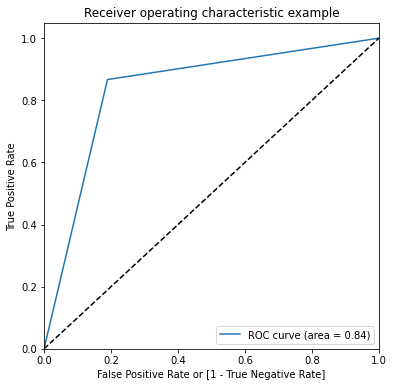

(array([0.        , 0.18938397, 1.        ]),
 array([0.        , 0.86678291, 1.        ]),
 array([2, 1, 0]))

In [45]:
draw_roc(y_test,y_pred)

In [0]:
data_rfe=data_new.copy()

In [47]:
data_rfe.head()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,class,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S1,flag_S2,flag_S3,flag_SH,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,1,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.00,0.00,0.03,0.17,0.00,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.07,0.00,0.05,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0.00,0.00,0.00,0.03,0.04,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,32,0.00,0.09,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0.06,0.00,0.05,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
data_rfe.dtypes

id                               int64
duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
srv_count                        int64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_rerror_rate           float64
class                            int64
protocol_type_udp        

In [49]:
data_rfe.shape

(91423, 101)

In [0]:
data_rfe.drop(['service_tftp_u','service_telnet','service_time','service_shell','service_pm_dump','service_ntp_u','service_http_8001','service_http_2784','service_harvest','service_finger','service_auth','service_aol','flag_S2','flag_RSTOS0','srv_count','is_host_login','num_outbound_cmds','num_access_files','num_shells','num_file_creations','num_compromised','hot','urgent','dst_bytes','src_bytes','land','duration','id'],axis=1,inplace=True)

In [51]:
data_rfe.shape

(91423, 73)

In [0]:
# Putting feature variable to X
X_rfe = data_rfe.drop(['class'],axis=1)

# Putting response variable to y
y_rfe = data_rfe['class']

In [0]:
#data_rfe.drop(['service_tftp_u','service_telnet','service_time','service_shell','service_pm_dump','service_ntp_u','service_http_8001','service_http_2784','service_harvest','service_finger','service_auth','service_aol','flag_S2','flag_RSTOS0','srv_count','is_host_login','num_outbound_cmds','num_access_files','num_shells','num_file_creations','num_compromised','hot','urgent','dst_bytes','src_bytes','land','duration','id'],axis=1,inplace=True)

In [53]:
data_rfe.shape

(91423, 73)

In [0]:
# Splitting the data into train and test
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe,y_rfe, train_size=0.7,test_size=0.3,random_state=100)

In [55]:
X_train_rfe.shape

(63996, 72)

In [0]:
# Running RFE Model after eleminitaing features with higher VIF value.

In [0]:
from sklearn.linear_model import LogisticRegression
log_rfe = LogisticRegression()

In [0]:
from sklearn.feature_selection import RFE
rfe = RFE(log_rfe, 70)            
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [58]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [59]:
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('wrong_fragment', True, 1),
 ('num_failed_logins', True, 1),
 ('logged_in', True, 1),
 ('root_shell', True, 1),
 ('diff_srv_rate', True, 1),
 ('srv_diff_host_rate', True, 1),
 ('dst_host_diff_srv_rate', True, 1),
 ('dst_host_same_src_port_rate', True, 1),
 ('dst_host_srv_diff_host_rate', True, 1),
 ('dst_host_rerror_rate', True, 1),
 ('protocol_type_udp', True, 1),
 ('flag_REJ', True, 1),
 ('flag_RSTO', True, 1),
 ('flag_RSTR', True, 1),
 ('flag_S1', True, 1),
 ('flag_S3', True, 1),
 ('flag_SH', False, 2),
 ('service_X11', True, 1),
 ('service_Z39_50', True, 1),
 ('service_bgp', True, 1),
 ('service_courier', True, 1),
 ('service_csnet_ns', True, 1),
 ('service_ctf', True, 1),
 ('service_daytime', True, 1),
 ('service_discard', True, 1),
 ('service_domain', True, 1),
 ('service_echo', True, 1),
 ('service_eco_i', True, 1),
 ('service_ecr_i', True, 1),
 ('service_efs', True, 1),
 ('service_exec', True, 1),
 ('service_ftp', True, 1),
 ('service_ftp_data', True, 1),
 ('service_gopher', 

### Dropping values with RFE values >1

In [0]:
data_rfe.shape

(91423, 73)

### Running the logistic model after RFE

In [61]:
# Let's run the model using the selected variables
log_rfe = LogisticRegression()
log_rfe.fit(X_train_rfe, y_train_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
X_train_rfe.shape

(63996, 72)

In [63]:
# Predicted probabilities
y_pred_rfe = log_rfe.predict(X_test_rfe)
y_pred_rfe
y_pred_df = pd.DataFrame(y_pred_rfe)
accuracy_rfe=accuracy_score(y_test_rfe,y_pred_df)
accuracy_rfe
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test_rfe, y_pred_rfe))
from sklearn import metrics
metrics.accuracy_score(y_test_rfe,y_pred_rfe)

[[15662   295]
 [  488 10982]]


0.9714514894082473

In [64]:
#Checking the accuracy on train model                                                                         
accuracy_score(y_train_rfe, log_rfe.predict(X_train_rfe))



0.9725764110256891

In [65]:
#Checking the accuracy on train model                                                                         
accuracy_score(y_train_rfe, log_rfe.predict(X_train_rfe))

#Accuracy on Test
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_rfe.score(X_test_rfe, y_test_rfe)))
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test_rfe, y_pred_rfe))
from sklearn import metrics
metrics.accuracy_score(y_test_rfe,y_pred_rfe)

Accuracy of logistic regression classifier on test set: 0.97
[[15662   295]
 [  488 10982]]


0.9714514894082473

### Running PCA after RFE

In [0]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [67]:
pca.fit(X_train_rfe)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [68]:
pca.components_

array([[ 8.21218728e-02,  1.34801498e-05, -8.71368671e-01, ...,
         6.33360127e-03,  5.92422819e-03,  6.20140570e-03],
       [-1.14950902e-02,  6.59961422e-04, -2.21543383e-01, ...,
         8.58334265e-03,  8.00429732e-03,  8.38119868e-03],
       [ 5.55309605e-01, -1.76239645e-03,  3.63314076e-01, ...,
        -2.15511222e-02, -2.00914957e-02, -2.10650789e-02],
       ...,
       [-9.99649415e-05,  5.88903557e-04,  1.48218704e-03, ...,
         1.17855590e-03,  1.16733403e-03,  1.16728131e-03],
       [-1.71618155e-04,  3.17770672e-04,  6.87060103e-04, ...,
         8.69689977e-04,  8.72286493e-04,  8.74395662e-04],
       [ 1.65130554e-04,  1.01760815e-04,  6.49389101e-04, ...,
         1.17202251e-04,  1.07983232e-04,  1.15748452e-04]])

In [69]:
colnames = list(X_train_rfe.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,Feature
0,0.082122,-0.011495,0.555310,wrong_fragment
1,0.000013,0.000660,-0.001762,num_failed_logins
2,-0.871369,-0.221543,0.363314,logged_in
3,-0.002773,-0.000764,0.001278,root_shell
4,0.044028,-0.022831,-0.049484,diff_srv_rate


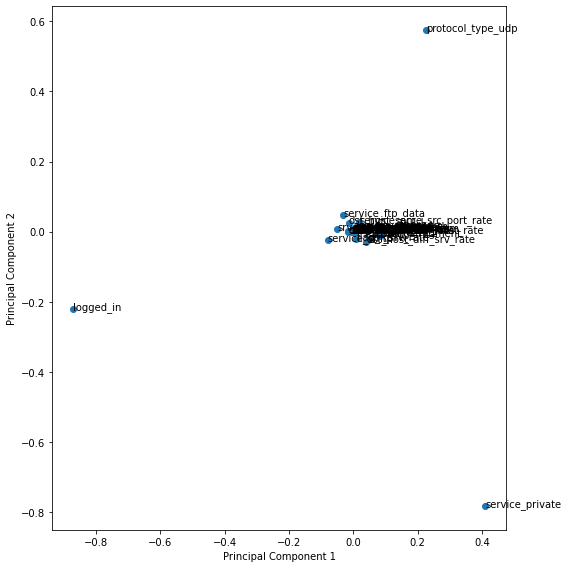

In [70]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [71]:
pca.explained_variance_ratio_

array([3.37757741e-01, 1.29203415e-01, 9.68259661e-02, 6.34608419e-02,
       5.11023116e-02, 4.29572145e-02, 2.14436834e-02, 1.79439727e-02,
       1.04476458e-02, 8.21947550e-03, 8.16160018e-03, 7.40576923e-03,
       7.13230053e-03, 7.02875342e-03, 6.74657287e-03, 6.51746089e-03,
       6.38370113e-03, 6.26879936e-03, 6.11921233e-03, 6.07742580e-03,
       5.85973546e-03, 5.55240623e-03, 5.45568591e-03, 5.29790239e-03,
       5.23456477e-03, 5.15769300e-03, 5.10019349e-03, 4.90767502e-03,
       4.69152466e-03, 4.58668874e-03, 4.50473032e-03, 4.45148454e-03,
       4.38730391e-03, 4.35566873e-03, 4.32068194e-03, 4.20784901e-03,
       4.14029832e-03, 4.11461668e-03, 4.05161651e-03, 4.00226373e-03,
       3.97039680e-03, 3.89479918e-03, 3.84840802e-03, 3.64548029e-03,
       3.49502314e-03, 3.48809643e-03, 3.40686207e-03, 3.37297463e-03,
       3.07919933e-03, 2.98423650e-03, 2.70577869e-03, 2.16751989e-03,
       2.01927249e-03, 1.94206138e-03, 1.71498529e-03, 1.66653320e-03,
      

In [72]:
abs(pca.explained_variance_ratio_)

array([3.37757741e-01, 1.29203415e-01, 9.68259661e-02, 6.34608419e-02,
       5.11023116e-02, 4.29572145e-02, 2.14436834e-02, 1.79439727e-02,
       1.04476458e-02, 8.21947550e-03, 8.16160018e-03, 7.40576923e-03,
       7.13230053e-03, 7.02875342e-03, 6.74657287e-03, 6.51746089e-03,
       6.38370113e-03, 6.26879936e-03, 6.11921233e-03, 6.07742580e-03,
       5.85973546e-03, 5.55240623e-03, 5.45568591e-03, 5.29790239e-03,
       5.23456477e-03, 5.15769300e-03, 5.10019349e-03, 4.90767502e-03,
       4.69152466e-03, 4.58668874e-03, 4.50473032e-03, 4.45148454e-03,
       4.38730391e-03, 4.35566873e-03, 4.32068194e-03, 4.20784901e-03,
       4.14029832e-03, 4.11461668e-03, 4.05161651e-03, 4.00226373e-03,
       3.97039680e-03, 3.89479918e-03, 3.84840802e-03, 3.64548029e-03,
       3.49502314e-03, 3.48809643e-03, 3.40686207e-03, 3.37297463e-03,
       3.07919933e-03, 2.98423650e-03, 2.70577869e-03, 2.16751989e-03,
       2.01927249e-03, 1.94206138e-03, 1.71498529e-03, 1.66653320e-03,
      

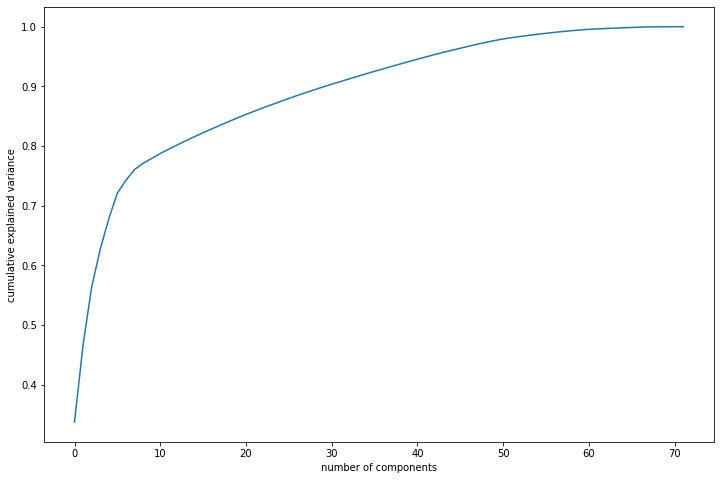

In [0]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [75]:
df_train_pca = pca_final.fit_transform(X_train_rfe)
df_train_pca.shape

(63996, 45)

In [77]:
df_train_pca = pca_final.fit_transform(X_train_rfe)
df_train_pca.shape

(63996, 45)

In [78]:
y_train_rfe.shape

(63996,)

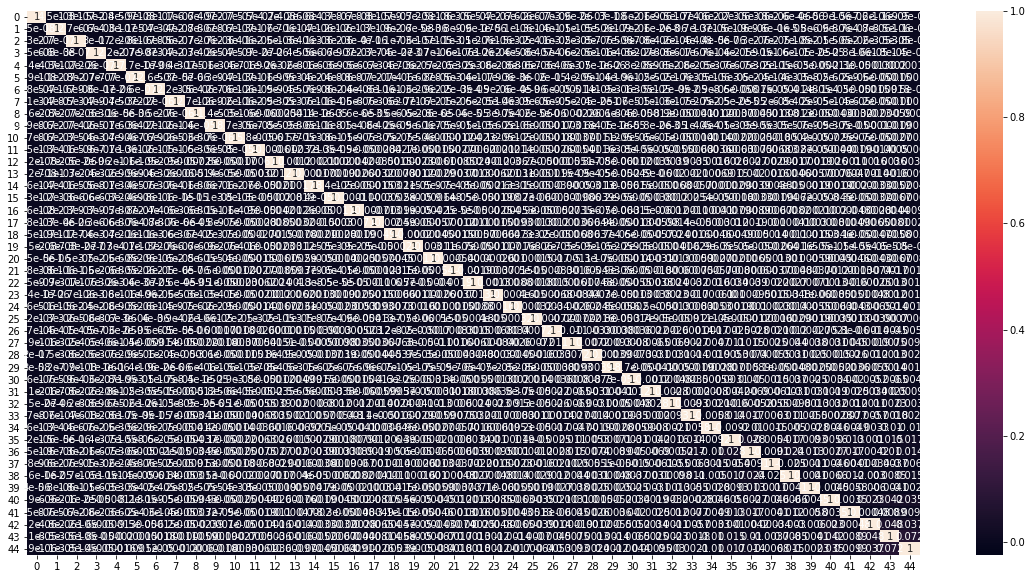

In [0]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [0]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0718576905542801 , min corr:  -0.024668563933693214


In [0]:
corr = data_rfe.corr()
acc1 = corr.abs().unstack()
acc1.sort_values(ascending = False)
display(acc1[acc1 > 0.5])

wrong_fragment               wrong_fragment                 1.000000
num_failed_logins            num_failed_logins              1.000000
logged_in                    logged_in                      1.000000
                             diff_srv_rate                  0.526915
                             class                          0.731572
root_shell                   root_shell                     1.000000
diff_srv_rate                logged_in                      0.526915
                             diff_srv_rate                  1.000000
                             class                          0.591914
srv_diff_host_rate           srv_diff_host_rate             1.000000
dst_host_diff_srv_rate       dst_host_diff_srv_rate         1.000000
                             class                          0.531894
dst_host_same_src_port_rate  dst_host_same_src_port_rate    1.000000
dst_host_srv_diff_host_rate  dst_host_srv_diff_host_rate    1.000000
dst_host_rerror_rate         dst_h

In [79]:
#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(X_test_rfe)
df_test_pca.shape

(27427, 45)

### Logistic Regression On PCA

In [0]:
#### Applying a logistic regression on our Principal Components
# We expect to get similar model performance with significantly lower features
# If we can do so, we would have done effective dimensionality reduction without losing any import information

In [0]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_rfe)

In [81]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test_rfe, pred_probs_test))

'0.99'

### We can see the accuracy has approved after applying PCA

### Running Random Forest on PCA

In [0]:
rf_random=RandomForestClassifier(random_state=42)
rf=rf_random.fit(df_train_pca,y_train_rfe)


In [83]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [84]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = 100,200,50

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [1, 2, 4]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [1, 2, 4, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': (100, 200, 50)}

In [86]:
rf = RandomForestClassifier(random_state=42)
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 2, verbose=3)

# Fit the random search model
rf_random.fit(df_train_pca, y_train_rfe)

Fitting 2 folds for each of 432 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.953, total=   1.4s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.952, total=   1.4s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.949, total=   2.9s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.949, total=   2.8s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.951, total=   0.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.951, total=   0.7s
[CV] bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed: 77.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [87]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [0]:
rf_final = RandomForestClassifier(bootstrap='False',
 max_depth= 1,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 10,
 n_estimators= 100)

In [94]:
rf_final.fit(df_train_pca,y_train_rfe)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
#Making prediction on the test data
pred_probs_test = rf_final.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test_rfe, pred_probs_test))

'0.97'

In [121]:
#Checking the accuracy on train model                                                                         
accuracy_score(y_train_rfe, rf_final.predict(df_train_pca))


0.940246265391587

In [0]:
importances = rf_final.feature_importances_

In [123]:
importances

array([0.11, 0.01, 0.18, 0.01, 0.07, 0.08, 0.06, 0.  , 0.02, 0.01, 0.  ,
       0.03, 0.  , 0.12, 0.04, 0.07, 0.02, 0.02, 0.01, 0.  , 0.  , 0.06,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.05, 0.  , 0.  , 0.  ,
       0.  ])

### XGBoost

In [0]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1],
                "gamma":[i/10.0 for i in range(0,2)],#change in ginni index
                "max_depth": [2,3,4],
                "min_child_weight":[1,2,4],#no of samples falling in each node
                "max_delta_step":[0,1,2,5,10],#control the upcoming updates
                "n_estimators":[100,200,50]
             }

In [0]:
xgb=XGBClassifier(objective='binary:logistic')


In [0]:
n_iter=2

random_search=RandomizedSearchCV(xgb,cv=2,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [146]:
random_search.fit(df_train_pca,y_train_rfe)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [147]:
xgb_best=random_search.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.1, max_delta_step=5, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [148]:
xgb_best.fit(df_train_pca,y_train_rfe)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.1, max_delta_step=5, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [151]:
xgb_train_prediction=xgb_best.predict(df_test_pca)
xgb_train_prediction

array([0, 0, 1, ..., 0, 1, 1])

In [152]:
roc_auc_score(y_test_rfe,xgb_train_prediction)

0.9853188432141545

In [153]:
accuracy_score(y_train_rfe, xgb_best.predict(df_train_pca))

0.9886242890180637